In [1]:
# Fetches the MNIST dataset
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False) # return array

In [4]:
X, y = mnist["data"], mnist["target"]
X.shape # 70000 images and each has 784 features (28*28 pixels).

(70000, 784)

In [5]:
y.shape # targets

(70000,)

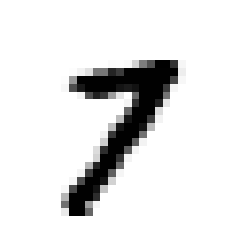

In [6]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# choose a digit from the dataset
some_digit = X[40000]
# reshape it to a 28*28 array
some_digit_image = some_digit.reshape(28, 28)
# display it using Matplotlib
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()

In [5]:
# what does label tell us?
y[40000]

'7'

In [7]:
# MNIST dataset has splitted into 
# a training set (the first 60,000 images) and a test set (the last 10,000 images)

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [8]:
# Shuffle the training set
import numpy as np
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [9]:
# Binary Classifier: 7 and not-7
# create the target vectors for this classification task
y_train_7 = (y_train == '7') # True for all 7s, False for all other digits.
y_test_7 = (y_test == '7')

In [10]:
# Stochastic Gradient Descent(SGD) classifier
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_7) # Learning 

SGDClassifier(random_state=42)

In [11]:
# Classification
sgd_clf.predict([some_digit])

array([ True])

In [14]:
# Measuring accuracy with Cross-Validation
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_7, cv=3, scoring="accuracy")

array([0.9792 , 0.97965, 0.9806 ])

In [15]:
# predict with cross_val_predict
from sklearn.model_selection import cross_val_predict
y_test_pred = cross_val_predict(sgd_clf, X_test, y_test_7, cv=3)

In [16]:
#confusion matrix
from sklearn.metrics import confusion_matrix
conf_mx= confusion_matrix(y_test_7, y_test_pred)
conf_mx

array([[8756,  216],
       [ 122,  906]], dtype=int64)

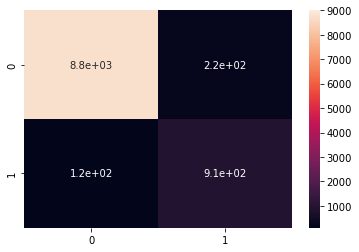

In [17]:
# heatmap
import seaborn as sns
ax = sns.heatmap(conf_mx, vmin=100, vmax=9000, annot=True)

In [18]:
#Precision
from sklearn.metrics import precision_score, recall_score
precision_score(y_test_7, y_test_pred)  # == 906 / ( 906 + 216)

0.8074866310160428

In [19]:
#Recall 
recall_score(y_test_7, y_test_pred) # == 906 / ( 906 + 122)

0.8813229571984436

In [20]:
#Decision scores for test data
y_scores = cross_val_predict(sgd_clf, X_test, y_test_7, cv=3,
method="decision_function")

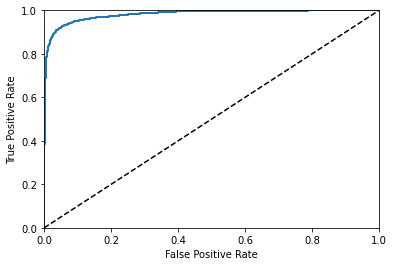

In [33]:
#Roc Curve
#False positive rate(FPR), True negative rate(TNR)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test_7, y_scores)
#Plot FPR against the TPR:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr, tpr)
plt.show()

In [25]:
# ROC AUC(the area under the curve)
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test_7, y_scores)

0.9822161814273893

In [26]:
#looking at the ROC curve and the ROC AUC score, you may think that
#the classifier is really good. But this is mostly because there are
#few positives (7s) compared to the negatives (non-7s). 